In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pb

In [ ]:
from google.colab import files
files.upload()

Saving car_data.csv to car_data (1).csv


{'car_data (1).csv': b'Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner\r\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\r\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\r\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\r\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\r\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\r\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\r\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\r\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\r\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\r\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\r\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\r\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\r\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\r\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\r\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\r\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\r\nertiga,2015,7.25,10.79,41678

In [ ]:
df=pd.read_csv("car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
correlation=df.corr()
print(correlation)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


<ipython-input-19-3f2743162e19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


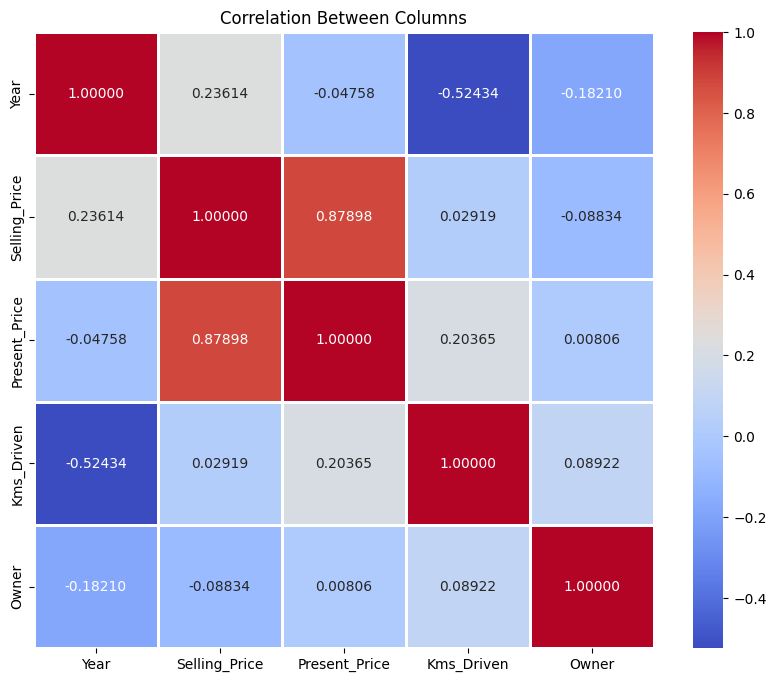

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".5f", linewidths=1)
plt.title('Correlation Between Columns')
plt.show()

In [ ]:
trans=df['Transmission'].unique()
print(trans)
fuel=df['Fuel_Type'].unique()
print(fuel)

['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [ ]:
X=np.asanyarray(df[['Year','Present_Price','Kms_Driven','Fuel_Type','Transmission']])
X

array([[2014, 5.59, 27000, 'Petrol', 'Manual'],
       [2013, 9.54, 43000, 'Diesel', 'Manual'],
       [2017, 9.85, 6900, 'Petrol', 'Manual'],
       ...,
       [2009, 11.0, 87934, 'Petrol', 'Manual'],
       [2017, 12.5, 9000, 'Diesel', 'Manual'],
       [2016, 5.9, 5464, 'Petrol', 'Manual']], dtype=object)

In [ ]:
from sklearn import preprocessing

le_fuel = preprocessing.LabelEncoder()
le_fuel.fit(['Petrol', 'Diesel', 'CNG'])
X[:, 3] = le_fuel.transform(X[:, 3])

le_transmission = preprocessing.LabelEncoder()
le_transmission.fit(['Manual', 'Automatic'])
X[:, 4] = le_transmission.transform(X[:, 4])

X



array([[2014, 5.59, 27000, 2, 1],
       [2013, 9.54, 43000, 1, 1],
       [2017, 9.85, 6900, 2, 1],
       ...,
       [2009, 11.0, 87934, 2, 1],
       [2017, 12.5, 9000, 1, 1],
       [2016, 5.9, 5464, 2, 1]], dtype=object)

In [ ]:
y=np.asanyarray(df['Selling_Price'])
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print("Training set: ",X_train.shape,y_train.shape)
print("testing set: ",X_test.shape,y_test.shape)

Training set:  (240, 5) (240,)
testing set:  (61, 5) (61,)


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)






In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.5289364823463845


<Axes: >

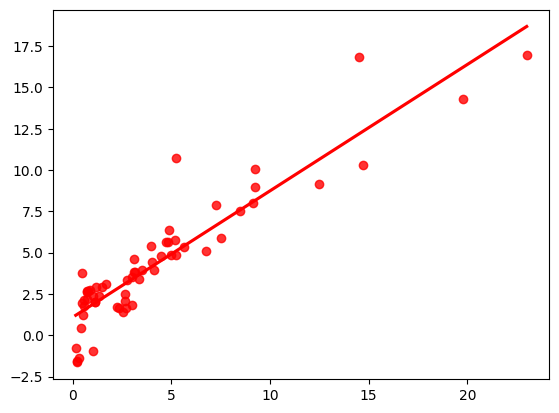

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="r")

<ipython-input-39-ee710fd0f58a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-39-ee710fd0f58a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

<Axes: ylabel='Density'>

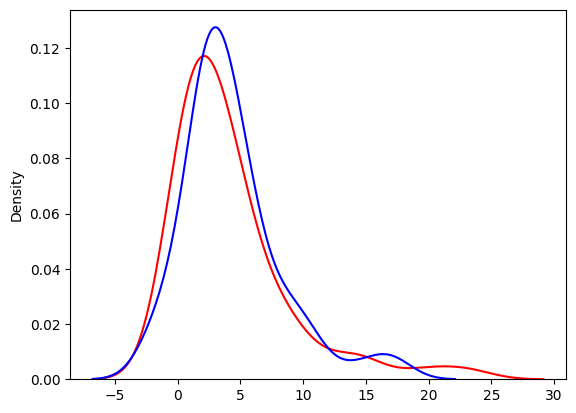

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)